C:\Users\Lenovo\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


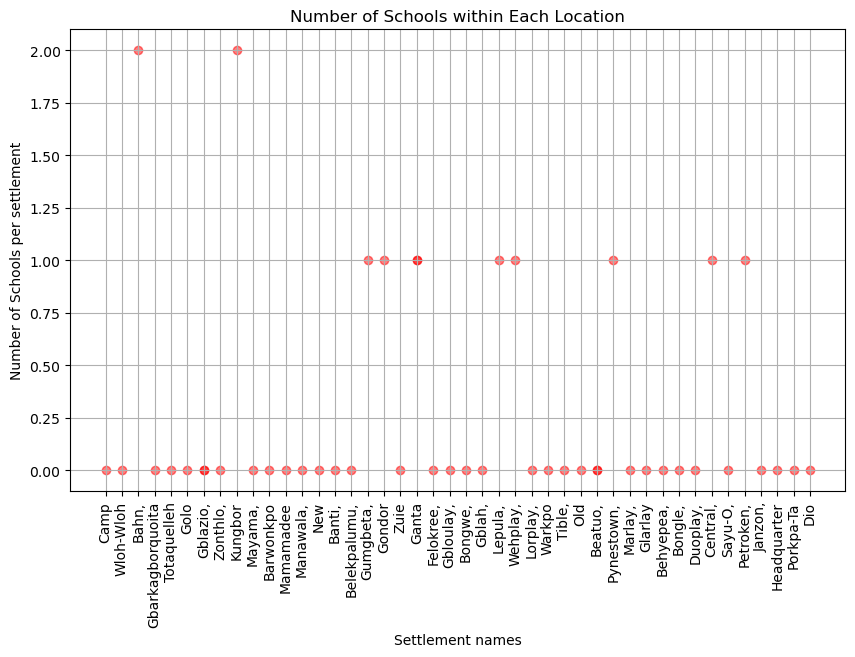

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22228\2547638234.py:23: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  locations_with_school_counts['geometry'] = locations_with_school_counts['geometry'].centroid


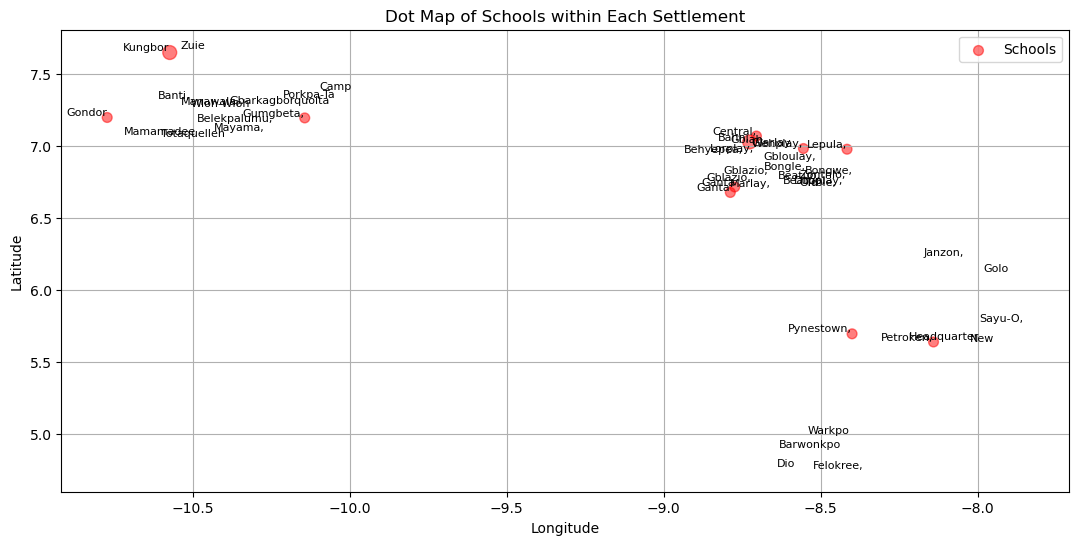

In [24]:

import geopandas as gpd
import matplotlib.pyplot as plt
locations = gpd.read_file('C:/Users/Lenovo/Downloads/FANCY DOCS/VIDA INTERVIEW/shapefiles/geocoded_locations.shp')
schools = gpd.read_file('C:/Users/Lenovo/Downloads/FANCY DOCS/VIDA INTERVIEW/Schools/schools.shp')
schools_within_locations = gpd.sjoin(schools, locations, op='within')
schools_count_per_location = schools_within_locations.groupby('index_right').size().rename('num_schools_within_location')
locations_with_school_counts = locations.merge(schools_count_per_location, left_index=True, right_index=True, how='left')
# Fill NaN values in the school count column with 0 (for settlements without schools)
locations_with_school_counts['num_schools_within_location'] = locations_with_school_counts['num_schools_within_location'].fillna(0)
# Visualize
plt.figure(figsize=(10, 6))
plt.scatter(locations_with_school_counts['Settlement'], locations_with_school_counts['num_schools_within_location'], color='red', alpha=0.5)
plt.title('Number of Schools within Each Location')
plt.xlabel('Settlement names')
plt.ylabel('Number of Schools per settlement')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()
# Fill NaN values in the school count column with 0 (for settlements without schools)
locations_with_school_counts['num_schools_within_location'] = locations_with_school_counts['num_schools_within_location'].fillna(0)

# Convert existing geometries to Point geometries
locations_with_school_counts['geometry'] = locations_with_school_counts['geometry'].centroid

# Create dot map with labels
plt.figure(figsize=(13, 6))
plt.scatter(locations_with_school_counts['geometry'].x, locations_with_school_counts['geometry'].y, 
            s=locations_with_school_counts['num_schools_within_location']*50, color='red', alpha=0.5, label='Schools')

# Add labels for settlements
for idx, row in locations_with_school_counts.iterrows():
    plt.annotate(row['Settlement'], (row['geometry'].x, row['geometry'].y), fontsize=8, ha='right', va='bottom')
plt.legend()
plt.title('Dot Map of Schools within Each Settlement')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()